# Principal Component Analysis (PCA) - breast cancer data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
data = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
scaled_data = preprocessing.scale(data) 

In [6]:
df_scaled_data = pd.DataFrame(scaled_data, columns = cancer['feature_names'])  

df_scaled_data     

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [7]:
pca = PCA()   # perform PCA and get 30 new coordinates 

pca.fit(scaled_data)

PCA()

In [8]:
# We look at the explained variance ratio for each PC to see how many we should use
# to reduce the dimensionality from 30 

per_var = np.round(pca.explained_variance_ratio_*100, 1)    
print(per_var)

[44.3 19.   9.4  6.6  5.5  4.   2.3  1.6  1.4  1.2  1.   0.9  0.8  0.5
  0.3  0.3  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.   0.
  0.   0. ]


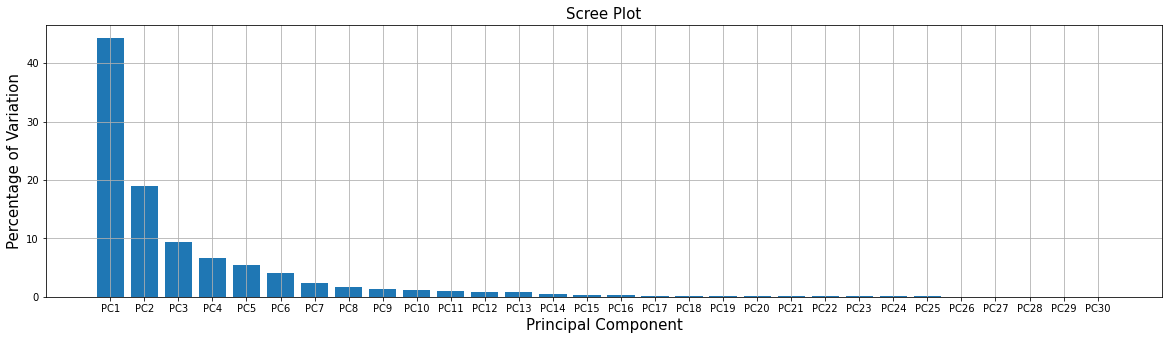

In [10]:
plt.figure(figsize = (20,5))

princ_comp = ["PC" + str(x) for x in range(1, 31)]

plt.bar(x = range(1, 31), height = per_var, tick_label = princ_comp)
plt.xlabel("Principal Component", fontsize = 15)
plt.ylabel("Percentage of Variation", fontsize = 15)
plt.title("Scree Plot", fontsize = 15)
plt.grid();

In [11]:
# PC1 = 0.219 * mean radius - 0.234 * mean texture ......

pd.DataFrame(pca.components_, columns = princ_comp, index = cancer["feature_names"])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
mean radius,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
mean texture,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
mean perimeter,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
mean area,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
mean smoothness,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
mean compactness,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
mean concavity,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
mean concave points,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
mean symmetry,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112141,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
mean fractal dimension,0.095486,0.240934,0.086386,0.074956,-0.069293,0.012936,-0.135602,0.008055,0.572069,0.081103,...,0.077362,0.029551,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076648,-0.029563,0.012610


In [13]:
# this table shows coordinates for each data observation (row) in the new coordinates system given by PC1, ..., PC30

pca_data = pca.transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns = princ_comp)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783


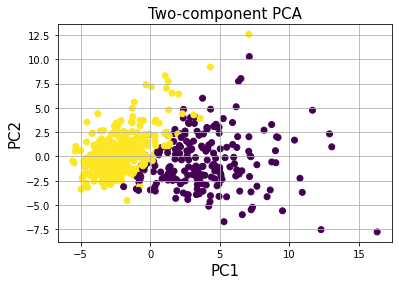

In [14]:
# We use only PC1 and PC2 to plot the scatter plot of projected data observations
# We also color each observation according to its label - malignant or benign

plt.scatter(pca_df.PC1, pca_df.PC2, c = cancer["target"])
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("Two-component PCA", fontsize = 15)
plt.grid();